# Figures and Plots
Running statistics on full dataset to get some of the characteristics.
Author: Karson Chrispens
Requires ab_proj env.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
import re

sns.set_context("notebook", font_scale = 0.6)
data = pd.read_csv("~/rosetta-antibody-ddgs/raw_datasets/use_this_data.csv")

### Plotting average LD per PDB NOTE: for interface mutations

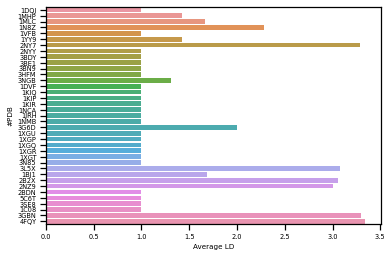

In [28]:
averages = pd.DataFrame()
averages["#PDB"] = data["#PDB"].unique()
averages_list = []
interface_data = data[data["Interface?"] == True]

for pdb in averages["#PDB"]:
    lds = interface_data[interface_data["#PDB"] == pdb]["LD"]
    averages_list.append(sum(lds) / len(lds))

averages["Average LD"] = averages_list
barplot = sns.barplot(x="Average LD", y="#PDB", data = averages)
plt.show()

### Average LD per source


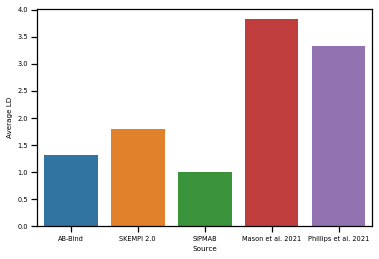

In [29]:
averages = pd.DataFrame()
averages["Source"] = data["Source"].unique()
averages_list = []

for source in averages["Source"]:
    lds = interface_data[interface_data["Source"] == source]["LD"]
    averages_list.append(sum(lds) / len(lds))

averages["Average LD"] = averages_list
barplot = sns.barplot(x="Source", y="Average LD", data=averages)
plt.show()

### Plotting number of mutations to each AA in the whole dataset


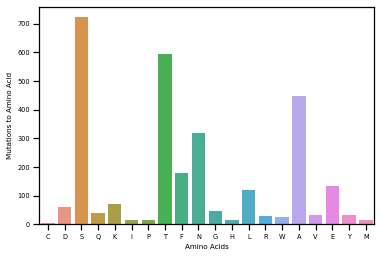

In [30]:
aas = ['C', 'D', 'S', 'Q', 'K',
       'I', 'P', 'T', 'F', 'N',
       'G', 'H', 'L', 'R', 'W',
       'A', 'V', 'E', 'Y', 'M']
muts_to_aa = []

for aa in aas:
    # count regex matches in mutations
    all_mut_aa = interface_data["Mutations"].apply(lambda x: re.findall(
        fr"\w:\w\d+{aa}", x))
    num_mut_per_data = all_mut_aa.apply(len)
    total_mut = sum(num_mut_per_data)
    muts_to_aa.append(total_mut)

data_muts_to_aa = pd.DataFrame(
    data={"Amino Acids": aas, "Mutations to Amino Acid": muts_to_aa})
sns.barplot(x="Amino Acids", y="Mutations to Amino Acid", data=data_muts_to_aa)
plt.show()

### Plotting mutations per PDB


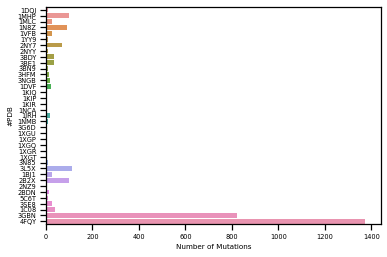

In [31]:
mut_pdbs = pd.DataFrame()
mut_pdbs["#PDB"] = data["#PDB"].unique()
mut_pdbs_list = []

for pdb in mut_pdbs["#PDB"]:
    lds = interface_data[interface_data["#PDB"] == pdb]["LD"]
    mut_pdbs_list.append(sum(lds))

mut_pdbs["Number of Mutations"] = mut_pdbs_list
barplot = sns.barplot(x="Number of Mutations", y="#PDB", data = mut_pdbs)
plt.show()

### Mutations per PDB without Phillips


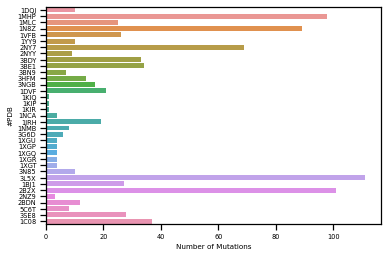

In [32]:
mut_pdbs = mut_pdbs[~(mut_pdbs["#PDB"].str.contains("3GBN") | mut_pdbs["#PDB"].str.contains("4FQY"))]
barplot = sns.barplot(x="Number of Mutations", y="#PDB", data=mut_pdbs)
plt.show()

### Average ddG for interface vs non-interface mutations


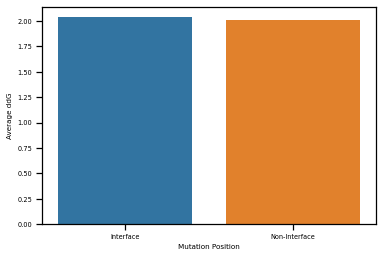

In [33]:
data = pd.read_csv("./raw_datasets/interface_data_use.csv")
non_int = data[data["Interface?"] == False]
interface = data[data["Interface?"] == True]

non_int_avg = sum(non_int["ddG(kcal/mol)"]) / len(non_int)
interface_avg = sum(interface["ddG(kcal/mol)"]) / len(interface)
avgs = pd.DataFrame({
    "Mutation Position": ["Interface", "Non-Interface"],
    "Average ddG": [interface_avg, non_int_avg]
})
barplot = sns.barplot(x = "Mutation Position", y = "Average ddG", data=avgs)
plt.show()

### ddG histogram for interface vs non-interface


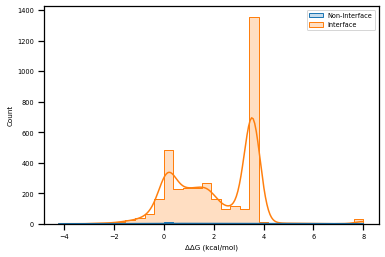

In [34]:
non_int_ddgs = non_int["ddG(kcal/mol)"]
interface_ddgs = interface["ddG(kcal/mol)"]

df = pd.DataFrame({
    "Non-Interface": non_int_ddgs,
    "Interface": interface_ddgs
})

histplot = sns.histplot(data = df, kde = True, element="step")
plt.xlabel("ΔΔG (kcal/mol)")
plt.show()

### Epistatic 1st order coeffs

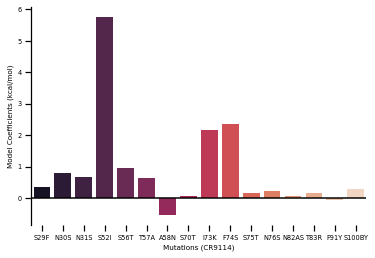

<Figure size 432x288 with 0 Axes>

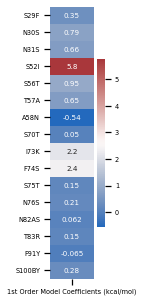

<Figure size 432x288 with 0 Axes>

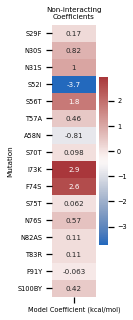

In [22]:
coeff_dict = {
    "S29F": 0.3474748118778095,
    "N30S": 0.7850383407363816,
    "N31S": 0.6615118758001257,
    "S52I": 5.751941190773612,
    "S56T": 0.9459365035490297,
    "T57A": 0.6456928920891415,
    "A58N": -0.5386655036571883,
    "S70T": 0.049680007275027735,
    "I73K": 2.1620856562256816,
    "F74S": 2.366870250624797,
    "S75T": 0.1521897924114612,
    "N76S": 0.20765234633346258,
    "N82AS": 0.0618895688006494,
    "T83R": 0.14655872622630178,
    "F91Y": -0.0647305093343003,
    "S100BY": 0.28464140588828324,
}

coeffs = pd.DataFrame({
    "Coefficients": coeff_dict.values(),
    "Mutations": coeff_dict.keys()
})

barplt = sns.barplot(x="Mutations", y="Coefficients", data=coeffs, palette="rocket")
sns.despine(bottom=True)
barplt.axhline(y=0, color="black")
barplt.set_xlabel("Mutations (CR9114)")
barplt.set_ylabel("Model Coefficients (kcal/mol)")
plt.show()
plt.clf()
fig, ax = plt.subplots(figsize=(1, 5))
coeffs = pd.DataFrame({"1st Order Model Coefficients (kcal/mol)": coeff_dict.values()}, index=coeff_dict.keys())
heatmap = sns.heatmap(data=coeffs, cmap="vlag", annot=True)
plt.show()
plt.clf()
fig, ax = plt.subplots(figsize=(1, 5))
coeffs = pd.read_csv("./raw_datasets/9114_2order_1.csv", index_col="Mutation")
heatmap = sns.heatmap(data=coeffs, cmap="vlag", annot=True)
plt.title("Non-interacting\nCoefficients")
plt.show()

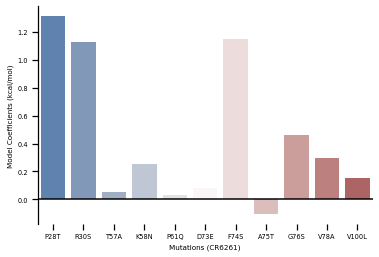

<Figure size 432x288 with 0 Axes>

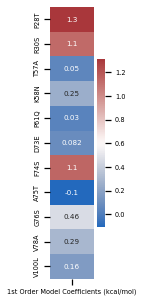

<Figure size 432x288 with 0 Axes>

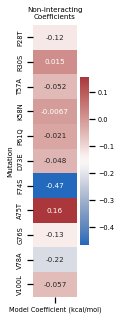

In [23]:
coeff_dict = {
    "P28T": 1.3125487578097275,
    "R30S": 1.1271353818461578,
    "T57A": 0.05041079565338836,
    "K58N": 0.25192585367828907,
    "P61Q": 0.030367383609466614,
    "D73E": 0.08223430957471058,
    "F74S": 1.1464864109761814,
    "A75T": -0.10433763817940633,
    "G76S": 0.4610491870945383,
    "V78A": 0.29463292741194436,
    "V100L": 0.1561891795098677
}

coeffs = pd.DataFrame({
    "Coefficients": coeff_dict.values(),
    "Mutations": coeff_dict.keys()
})

barplt = sns.barplot(x="Mutations", y="Coefficients", data=coeffs, palette="vlag")
sns.despine(bottom=True)
barplt.axhline(y=0, color="black")
barplt.set_xlabel("Mutations (CR6261)")
barplt.set_ylabel("Model Coefficients (kcal/mol)")
plt.show()
plt.clf()
fig, ax = plt.subplots(figsize=(1, 5))
coeffs = pd.DataFrame({"1st Order Model Coefficients (kcal/mol)": coeff_dict.values()}, index=coeff_dict.keys())
heatmap = sns.heatmap(data=coeffs, cmap="vlag", annot=True)
plt.show()
plt.clf()
fig, ax = plt.subplots(figsize=(1, 5))
coeffs = pd.read_csv("./raw_datasets/6261_2order_1.csv", index_col="Mutation")
heatmap = sns.heatmap(data=coeffs, cmap="vlag", annot=True)
plt.title("Non-interacting\nCoefficients")
plt.show()

### Epistatic 2nd Order Coeffs

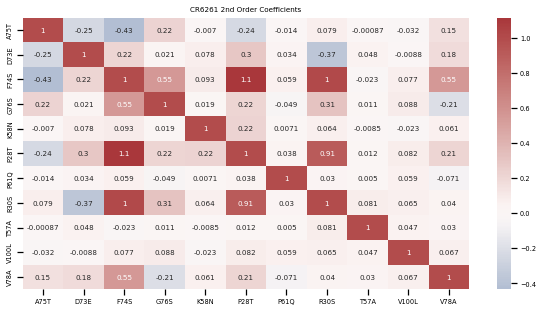

In [15]:
data = pd.read_csv("./raw_datasets/6261_2order.csv")
idx = np.unique(data[['Mut1','Mut2']].values.ravel())
data1 = data.pivot_table('Coefficient','Mut1','Mut2').reindex(index=idx, columns=idx)
data2 = data.pivot_table('Coefficient','Mut2','Mut1').reindex(index=idx, columns=idx)
data = data1.combine_first(data2)
data = data.fillna(1)
fig, ax = plt.subplots(figsize=(10, 5))
plot = sns.heatmap(data=data, cmap='vlag', center=0, annot=True)
plot.set_title("CR6261 2nd Order Coefficients (kcal/mol)")
plt.ylabel("")
plt.show()

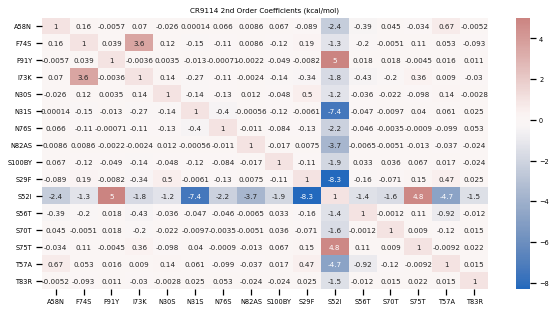

In [18]:
data = pd.read_csv("./raw_datasets/9114_2order.csv")
idx = np.unique(data[['Mut1','Mut2']].values.ravel())
data1 = data.pivot_table('Coefficient','Mut1','Mut2').reindex(index=idx, columns=idx)
data2 = data.pivot_table('Coefficient','Mut2','Mut1').reindex(index=idx, columns=idx)
data = data1.combine_first(data2)
data = data.fillna(1)
fig, ax = plt.subplots(figsize=(10, 5))
plot = sns.heatmap(data=data, cmap='vlag', center=0, annot=True)
plot.set_title("CR9114 2nd Order Coefficients (kcal/mol)")
plt.ylabel("")
plt.show()

### ddG Plot for current ddGs

   #PDB Mutations  ddG(kcal/mol)   Source     8 5 r   8 5 r s  Unnamed: 6  \
0  1DQJ    H:D32A            2.0  AB-Bind  3.525399  3.168963         NaN   
1  1DQJ    H:W98A            4.9  AB-Bind  2.719820  1.787338         NaN   
2  1DQJ    H:Y33A            5.5  AB-Bind  5.075163  4.623495         NaN   
3  1DQJ    H:Y50A            6.9  AB-Bind  2.059272  1.365394         NaN   
4  1DQJ    H:Y53A            1.2  AB-Bind  5.975624  5.603765         NaN   

          R  
0  0.292968  
1  0.322722  
2       NaN  
3       NaN  
4       NaN  
   Q('8 5 r s')
0      3.168963
1      1.787338
2      4.623495
   Intercept  Q('ddG(kcal/mol)')
0        1.0                 2.0
1        1.0                 4.9
2        1.0                 5.5
                            OLS Regression Results                            
Dep. Variable:           Q('8 5 r s')   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.101
Method:             

Text(0.5, 0, 'Predicted ΔΔG (kcal/mol)')

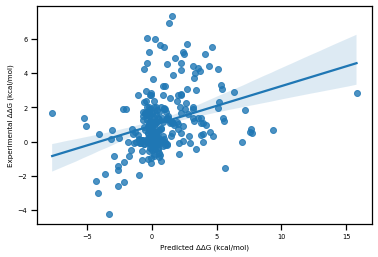

In [12]:
ddgs = pd.read_excel("./FLEX_RUNS.xlsx", "Sheet1")
ddgs = ddgs.dropna(subset="8 5 r s")
print(ddgs.head())
y, X = dmatrices("Q('8 5 r s') ~ Q('ddG(kcal/mol)')", data = ddgs, return_type='dataframe')
print(y[:3])
print(X[:3])
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
sns.regplot(x = "8 5 r s", y = "ddG(kcal/mol)", data=ddgs)
plt.title("Best Current Correlation")
plt.ylabel("Experimental ΔΔG (kcal/mol)")
plt.xlabel("Predicted ΔΔG (kcal/mol)")

### Parameters Figure

<AxesSubplot:xlabel='ensemble', ylabel='R'>

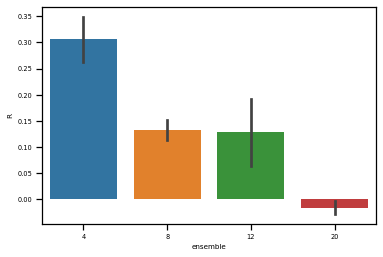

In [12]:
from numpy import median


data = pd.read_excel("./ParameterTracking.xlsx", "Sheet1")

# print(data.head())
data = data[data["ensemble"] != 10]
data = data[data["ensemble"] != 5]
data = data[data["ensemble"] != 3]
# print(data.head())

sns.barplot(x="ensemble", y="R", data=data, ci="sd", estimator=np.median)